In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/diabetes.csv')

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
np.random.seed(42)

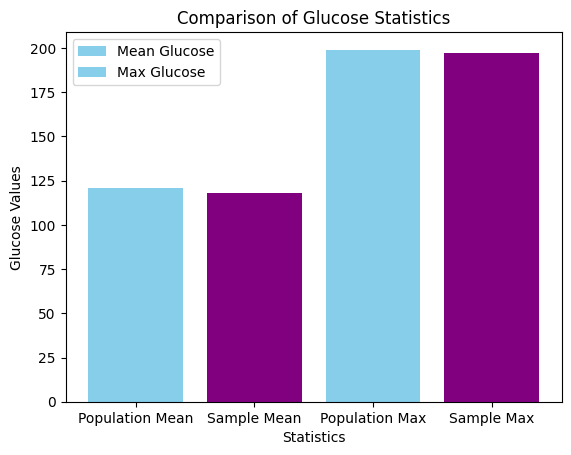

In [14]:
#Random sample of 35 observations
sample = df.sample(35)

# Population statistics for Glucose
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Sample statistics for Glucose
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Plot comparison for Glucose
plt.bar(['Population Mean', 'Sample Mean'], [population_mean_glucose, sample_mean_glucose],color=['skyblue', 'purple'], label='Mean Glucose')
plt.bar(['Population Max', 'Sample Max'], [population_max_glucose, sample_max_glucose],color=['skyblue', 'purple'], label='Max Glucose')
plt.xlabel('Statistics')
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics')
plt.legend()
plt.show()

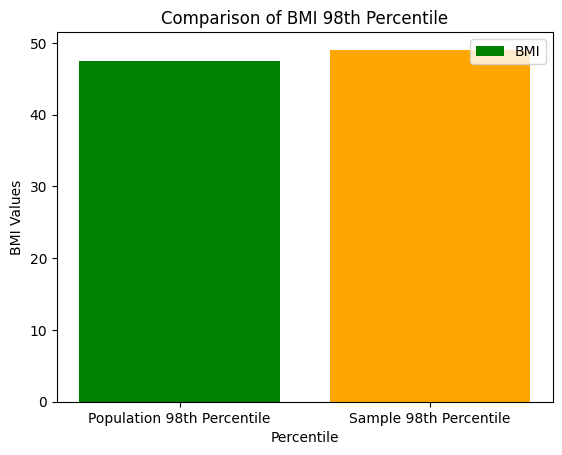

In [18]:
# b) 98th percentile of BMI
population_98th_percentile_bmi = np.percentile(df['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
colors=["green","orange"]
# Plot comparison for BMI percentiles
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'], [population_98th_percentile_bmi, sample_98th_percentile_bmi],color=colors, label='BMI')
plt.xlabel('Percentile')
plt.ylabel('BMI Values')
plt.title('Comparison of BMI 98th Percentile')
plt.legend()
plt.show()

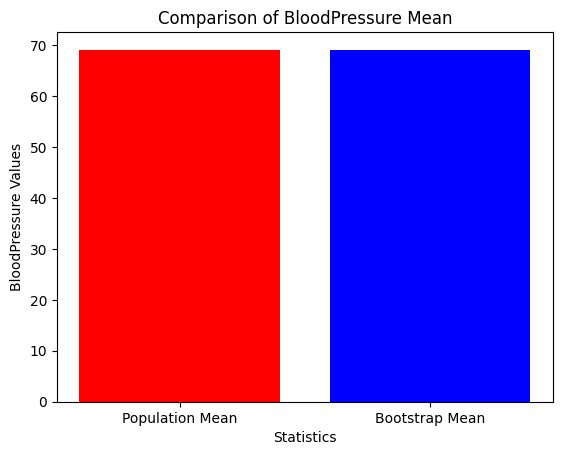

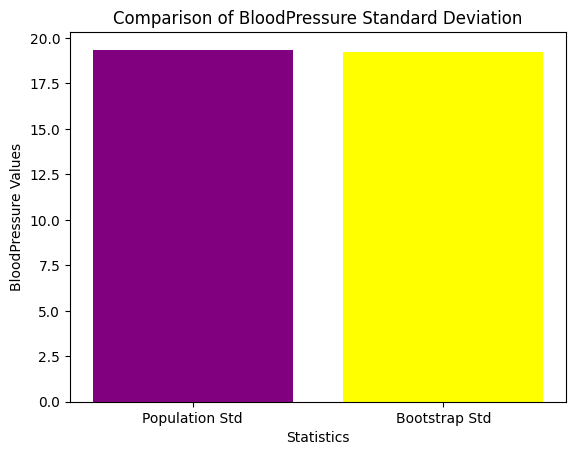

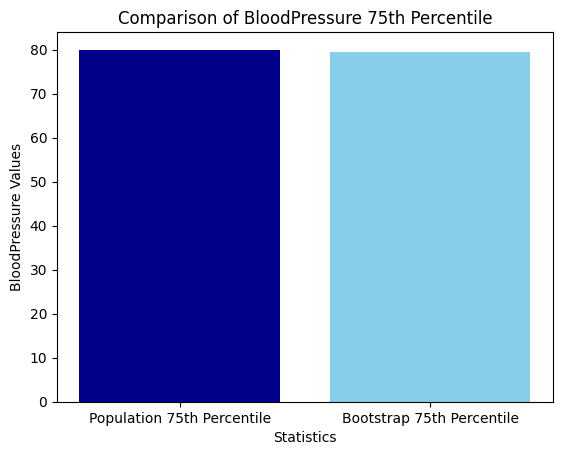

Population Mean BloodPressure: 69.10546875, Bootstrap Mean BloodPressure: 69.06356
Population Std BloodPressure: 19.355807170644777, Bootstrap Std BloodPressure: 19.253609907833404
Population 75th Percentile BloodPressure: 80.0, Bootstrap 75th Percentile BloodPressure: 79.502


In [28]:
# c) Bootstrap for BloodPressure
n_bootstrap_samples = 500
bootstrap_sample_size = 150

bootstrap_statistics = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = df['BloodPressure'].sample(bootstrap_sample_size, replace=True)
    bootstrap_statistics.append({
        'Mean': bootstrap_sample.mean(),
        'Std': bootstrap_sample.std(),
        'Percentile': np.percentile(bootstrap_sample, 75)  # You can change the percentile as needed
    })

# Calculate population statistics for BloodPressure
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 75)

# Plot comparison for BloodPressure Mean
plt.bar(['Population Mean', 'Bootstrap Mean'], [population_mean_bp, np.mean([stat['Mean'] for stat in bootstrap_statistics])],color=["red","blue"])
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Mean')
plt.show()

# Plot comparison for BloodPressure Std
plt.bar(['Population Std', 'Bootstrap Std'], [population_std_bp, np.mean([stat['Std'] for stat in bootstrap_statistics])],color=["purple","yellow"])
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Standard Deviation')
plt.show()

# Plot comparison for BloodPressure 75th Percentile
plt.bar(['Population 75th Percentile', 'Bootstrap 75th Percentile'],
        [population_percentile_bp, np.mean([stat['Percentile'] for stat in bootstrap_statistics])],color=["darkblue","skyblue"])
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure 75th Percentile')
plt.show()

# Report findings based on the comparisons made
print(f"Population Mean BloodPressure: {population_mean_bp}, Bootstrap Mean BloodPressure: {np.mean([stat['Mean'] for stat in bootstrap_statistics])}")
print(f"Population Std BloodPressure: {population_std_bp}, Bootstrap Std BloodPressure: {np.mean([stat['Std'] for stat in bootstrap_statistics])}")
print(f"Population 75th Percentile BloodPressure: {population_percentile_bp}, Bootstrap 75th Percentile BloodPressure: {np.mean([stat['Percentile'] for stat in bootstrap_statistics])}")